## Linear Regression with symbol

This sample constructs a simple linear regression model with symbol.

To caculate the weights and bias of the following formula:

x1*weight1 + x2*weight2 + bias = y

In [1]:
import mxnet as mx
import numpy as np

#### Generate sample data

In [2]:
b = 13
w1 = 14
w2 = 19

sample_number = 100

x1 = np.random.rand(sample_number)
x2 = np.random.rand(sample_number)
noise = np.random.rand(sample_number)

x0_array = mx.nd.ones((sample_number,))
x1_array = mx.nd.array(x1)-0.5
x2_array = mx.nd.array(x2)-0.5
noise_array = mx.nd.array(noise)-0.5

x_data = mx.nd.concat(x0_array, x1_array, x2_array, dim=0).reshape((3,sample_number)).T
y_data = x1_array*w1 + x2_array*w2 + b + noise_array*0.01

x_data[0:3].asnumpy()

array([[ 1.        , -0.23718551,  0.1684857 ],
       [ 1.        , -0.0388996 ,  0.14066386],
       [ 1.        , -0.07506239,  0.242643  ]], dtype=float32)

#### Construct the model

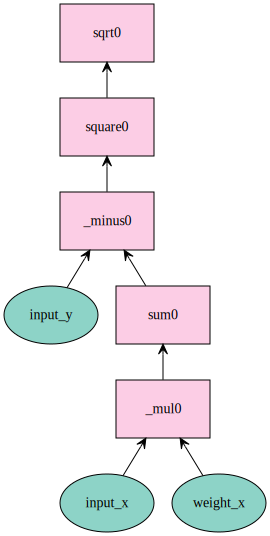

In [3]:

input_x = mx.sym.Variable("input_x")
weight_x = mx.sym.Variable("weight_x")

input_y = mx.sym.Variable("input_y")

multiple_result = input_x * weight_x

sum_result = mx.sym.sum(multiple_result)

lost = mx.sym.sqrt(mx.sym.square(input_y - sum_result))

mx.viz.plot_network(symbol = lost)

#### Create the init weights

weight_x_para is the placeholder of weights and bias

weight_x_g is used to store gradience 

In [4]:
weight_x_para = mx.nd.empty((3,))

weight_x_g = mx.nd.zeros((3,))



#### Train the model

With for loop, we can call the forward and backward function again and again, to caculate the gradience of weights and then udpate the weights

In [5]:
epoch = 20
output_batch = 100

for j in range(0, epoch):
    for i in range(0,sample_number-1):
        exe = lost.bind(mx.cpu(), {"input_x":x_data[i],"weight_x":weight_x_para, "input_y":y_data[i]}, \
                    args_grad = {'weight_x':weight_x_g})
        result = exe.forward(is_train=True)

        lost_value = result[0].asscalar()

        if (i%output_batch == 0):
            print "lost is",
            print lost_value

        exe.backward(result[0])

        weight_x_para = weight_x_para - weight_x_g
   
print "weight is: [b, w1, w2]"
print weight_x_para.asnumpy()



lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
lost is nan
weight is: [b, w1, w2]
[ nan  nan  nan]


In [6]:
batch_size = 1

train_iter = mx.io.NDArrayIter(x_data,y_data, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(x_data, y_data, batch_size, shuffle=False)

In [7]:
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")

In [10]:
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
    
)


In [11]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
            num_epoch=3,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2),
            eval_metric='mse')

INFO:root:Epoch[0] Batch [2]	Speed: 2076.90 samples/sec	mse=157.603538
INFO:root:Epoch[0] Batch [4]	Speed: 2372.34 samples/sec	mse=37.256549
INFO:root:Epoch[0] Batch [6]	Speed: 2801.81 samples/sec	mse=62.511752
INFO:root:Epoch[0] Batch [8]	Speed: 2298.88 samples/sec	mse=28.796870
INFO:root:Epoch[0] Batch [10]	Speed: 2466.51 samples/sec	mse=164.790785
INFO:root:Epoch[0] Batch [12]	Speed: 2272.72 samples/sec	mse=107.762424
INFO:root:Epoch[0] Batch [14]	Speed: 2702.52 samples/sec	mse=59.774755
INFO:root:Epoch[0] Batch [16]	Speed: 2159.79 samples/sec	mse=38.456524
INFO:root:Epoch[0] Batch [18]	Speed: 2525.17 samples/sec	mse=67.144672
INFO:root:Epoch[0] Batch [20]	Speed: 2386.52 samples/sec	mse=5.054033
INFO:root:Epoch[0] Batch [22]	Speed: 2532.03 samples/sec	mse=20.111493
INFO:root:Epoch[0] Batch [24]	Speed: 2656.30 samples/sec	mse=17.087267
INFO:root:Epoch[0] Batch [26]	Speed: 2275.19 samples/sec	mse=4.342192
INFO:root:Epoch[0] Batch [28]	Speed: 2312.19 samples/sec	mse=33.375528
INFO:root